In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [2]:
column_names = ['time','amplitude']
filenames = ['И124.prn', 'И4529.prn', 'РБ122.prn']
data_124 = pd.read_csv(filenames[0],header=None, delimiter='\s+', names=column_names)
data_4529 = pd.read_csv(filenames[1],header=None, delimiter='\s+', names=column_names)
data_122 = pd.read_csv(filenames[2],header=None, delimiter='\s+', names=column_names)

data_124['time']/=1000
data_4529['time']/=1000
data_122['time']/=1000

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_12676/2911524462.py:3: SyntaxWarning: invalid escape sequence '\s'
  data_124 = pd.read_csv(filenames[0],header=None, delimiter='\s+', names=column_names)
/tmp/ipykernel_12676/2911524462.py:4: SyntaxWarning: invalid escape sequence '\s'
  data_4529 = pd.read_csv(filenames[1],header=None, delimiter='\s+', names=column_names)
/tmp/ipykernel_12676/2911524462.py:5: SyntaxWarning: invalid escape sequence '\s'
  data_122 = pd.read_csv(filenames[2],header=None, delimiter='\s+', names=column_names)


In [28]:
T2 = np.logspace(-1, 3, 56)
indexes = ["magnitude_" + str(i) for i in np.arange(T2.shape[0])]
m124 = pd.DataFrame([np.exp(-data_124['time'] / i) for i in T2], index=indexes).T
m4529 = pd.DataFrame([np.exp(-data_4529['time'] / i) for i in T2], index=indexes).T
m122 = pd.DataFrame([np.exp(-data_122['time'] / i) for i in T2], index=indexes).T
magnitudes = [m124, m4529, m122]

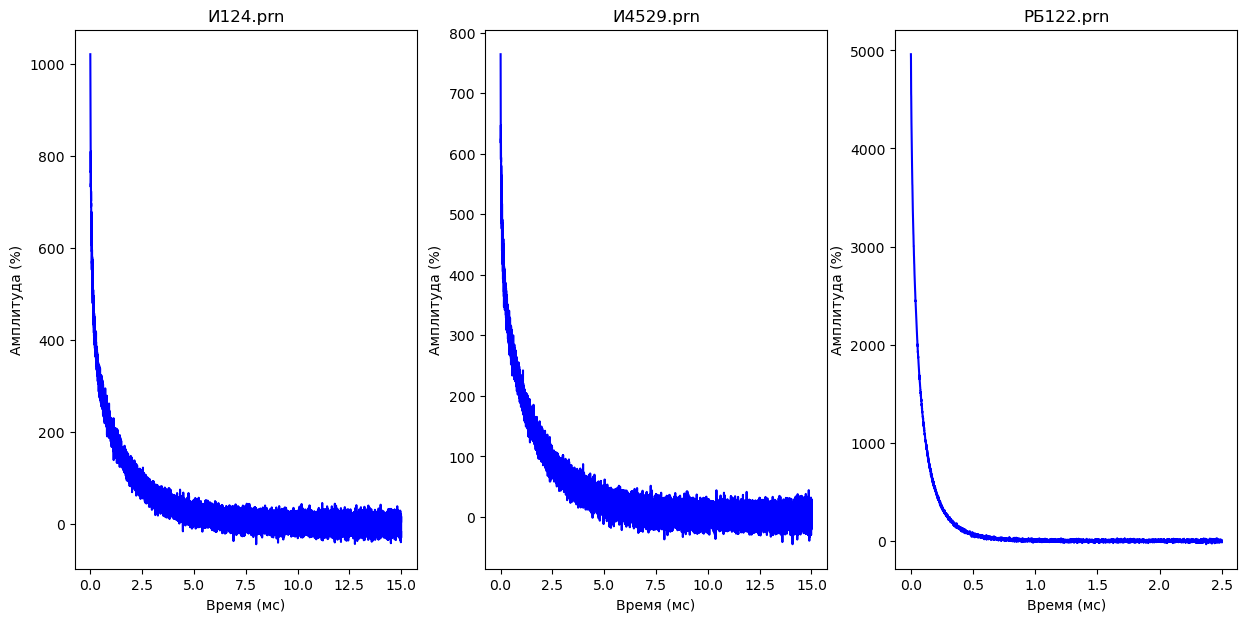

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(15,7))
for i, data in enumerate((data_124, data_4529, data_122)):
    axs[i].plot(data['time'], data['amplitude'], color='blue')
    axs[i].set_title(filenames[i])
    axs[i].set_xlabel('Время (мс)')
    axs[i].set_ylabel('Амплитуда (%)')
plt.show()

In [5]:
models = {
    'LR': LinearRegression(positive=True),
    'Ridge': Ridge(positive=True, max_iter=3000),
    'Lasso': Lasso(positive=True, max_iter=3000),
    'ElasticNet': ElasticNet(positive=True, max_iter=3000)
}

params = {
    'LR': {},  # LinearRegression не требует параметров
    'Ridge': {'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.5, 1, 2, 5, 10]},
    'Lasso': {'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.5, 1, 2, 5, 10]},
    'ElasticNet': {
        'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.5, 1, 2, 5, 10],
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
    }
}

def best_model(X, y, model_dict, param_dict):
    results = []
    for name, model in model_dict.items():
        grid = GridSearchCV(model, param_dict[name], cv=5)
        grid.fit(X, y.ravel())
        results.append((grid.best_estimator_, grid.best_score_))
    
    best_model = max(results, key=lambda x: x[1])[0]

    return best_model, results

In [6]:
data_124['amplitude']

0        1020.156466
1        1013.586268
2        1001.464677
3         999.287867
4         943.045233
            ...     
29995     -10.969489
29996       4.657891
29997      17.013071
29998     -29.296794
29999     -16.922180
Name: amplitude, Length: 30000, dtype: float64

In [15]:
best_model_124, results_124 = best_model(m124, data_124['amplitude'], models, params)

/tmp/ipykernel_12676/1287401297.py:22: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  grid.fit(X, y.ravel())
/tmp/ipykernel_12676/1287401297.py:22: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  grid.fit(X, y.ravel())
/tmp/ipykernel_12676/1287401297.py:22: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  grid.fit(X, y.ravel())
/home/spaceswimmer/miniconda3/envs/rapids-25.04/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.

In [18]:
best_model_4529, results_4529 = best_model(m4529, data_4529['amplitude'], models, params)

/tmp/ipykernel_12676/1287401297.py:22: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  grid.fit(X, y.ravel())
/tmp/ipykernel_12676/1287401297.py:22: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  grid.fit(X, y.ravel())
/tmp/ipykernel_12676/1287401297.py:22: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  grid.fit(X, y.ravel())
/home/spaceswimmer/miniconda3/envs/rapids-25.04/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.

In [23]:
best_model_122, results_122 = best_model(m122, data_122['amplitude'], models, params)

/tmp/ipykernel_12676/1287401297.py:22: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  grid.fit(X, y.ravel())
/tmp/ipykernel_12676/1287401297.py:22: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  grid.fit(X, y.ravel())
/tmp/ipykernel_12676/1287401297.py:22: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  grid.fit(X, y.ravel())
/home/spaceswimmer/miniconda3/envs/rapids-25.04/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.

In [24]:
best_models = [best_model_124, best_model_4529, best_model_122]

In [26]:
best_model_122

LinearRegression(positive=True)

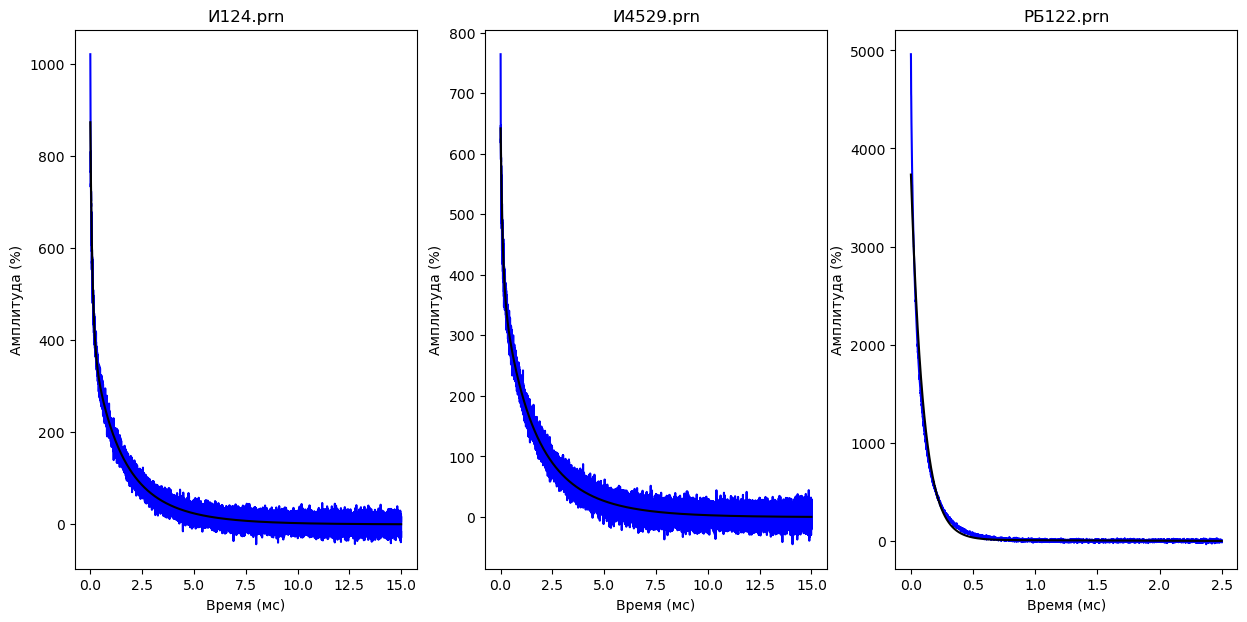

In [29]:

fig, axs = plt.subplots(1, 3, figsize=(15,7))
for i, data in enumerate((data_124, data_4529, data_122)):
    axs[i].plot(data['time'], data['amplitude'], color='blue')
    axs[i].plot(data['time'], best_models[i].predict(magnitudes[i]), color='black', label='Предсказание модели')
    axs[i].set_title(filenames[i])
    axs[i].set_xlabel('Время (мс)')
    axs[i].set_ylabel('Амплитуда (%)')
plt.show()